In [25]:
from pricing import visual
from pricing import market_data
import numpy as np

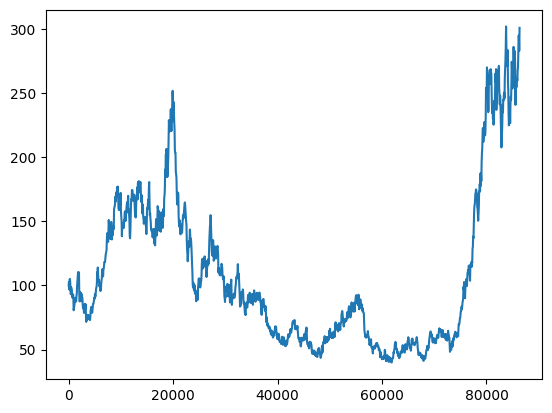

In [ ]:


# Ticker	Nome
# run simulation of stock price with given volatilty and drift
input_kwargs = {"volatility": 0.005,
                "drift" : 0.00002,
                "S0" : 100,
                "t0" : 0,
                "T" : 3600*24,
                "dt" : 60}

sim = market_data.simulation(**input_kwargs)
t,val = sim.forward()
visual.plot_signal(t,val)
avg_val = np.zeros_like(val)
M = 1000
for i in range(M):
    t,val = sim.forward()
    avg_val = avg_val/M

visual.plot_signal(t,avg_val)


In [ ]:

# compute BS price of option

# Implement delta hedging and test that gains/losses are zero


tickers_collection = ['AAPL','MSFT','NVDA',	'AMD','TSLA','META','SPY']
for ticker_name in tickers_collection:
    # download

    # get options 

    # estimate price with different volatilities

    # estimate the actual volatility

    # compare BS price w.r.t. real 

    # payoff graph over time

    # Implement delta hedging

    # Compute losses/gains 

    # Implement gamma, vega, rho

    # compute losses/gains
    pass

    